In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

import math

In [189]:
pandas_profiling.ProfileReport(ween)

Number of variables,16
Number of observations,163
Total Missing (%),0.2%
Total size in memory,20.5 KiB
Average record size in memory,128.5 B
Numeric,11
Categorical,2
Boolean,0
Date,0
Text (Unique),1
Rejected,2


In [74]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [14]:
feat = pd.read_csv('ween_studio_albums_audio_features.csv')
lyr = pd.read_csv('ween_studio_albums_lyrics.csv')

In [8]:
ween = pd.read_csv('ween.csv')

In [9]:
#find instrumental and change to empty sring ("")
ween['clean_text'] = ween['clean_text'].replace(['instrumental'], "")
#pinkeye on my leg and the fucked jam
ween['clean_text'] = ween['clean_text'].replace(['instrumental  bark uhhhh repeats', 'nope or endless gibberish'], "")

In [77]:
def clean_lastfm_col(df):
    #check values that don't have a K in them
    scr_no_k = []
    lis_no_k = []
    
    for index, row in df.iterrows():
        if 'K' not in row.scrobbles:
            scr_no_k.append(index)

    for index, row in df.iterrows():
        if 'K' not in row.listeners:
            lis_no_k.append(index)
  
    #change scrobble and listener strings to integers and multiply with 1000
    df.scrobbles = df.scrobbles.str.replace('K',"")
    df.scrobbles = df.scrobbles.str.replace(',','')
    df['scrobbles'] = df.apply(lambda row: int(float(row.scrobbles) * 1000), axis=1) 

    df.listeners = df.listeners.str.replace('K',"")
    df.listeners = df.listeners.str.replace(',','')
    df['listeners'] = df.apply(lambda row: int(float(row.listeners) * 1000), axis=1) 
    
    #for the values that didn't have K, divide by 1000
    for i in scr_no_k:
        df.scrobbles.iloc[i] = df.scrobbles.iloc[i] / 1000
    for i in lis_no_k:
        df.listeners.iloc[i] = df.listeners.iloc[i] / 1000
        
 

In [78]:
clean_lastfm_col(ween)

In [79]:
#update wrong values

#stallion 3  scr: 90.1 lis:18.9
ween.scrobbles.iloc[54] = 90100
ween.listeners.iloc[54] = 18900

#stallion 2: scr 18.5 lis 8
ween.scrobbles.iloc[51] = 18500
ween.listeners.iloc[51] = 8000

#stallion 1: scr 29.2 lis 11
ween.scrobbles.iloc[33] = 29200
ween.listeners.iloc[33] = 11000

#i dont want leave farm  scr 58.9  lis 18
ween.scrobbles.iloc[90] = 58900
ween.listeners.iloc[90] = 18000

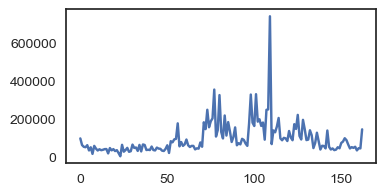

In [353]:
ween.scrobbles.plot()

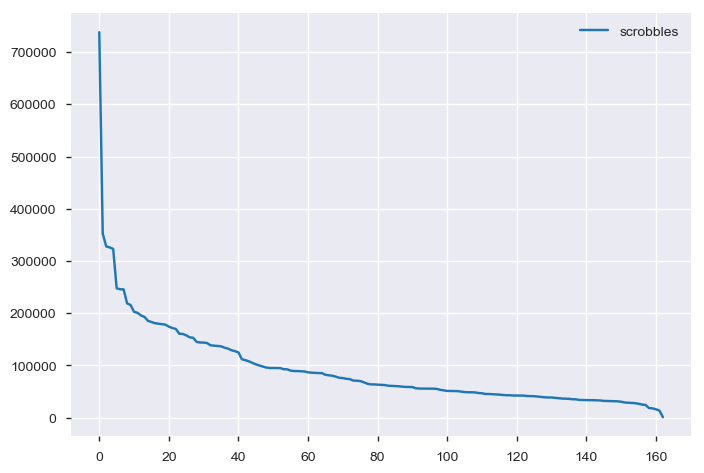

In [201]:
ween.sort_values('scrobbles', ascending=False).scrobbles.reset_index().drop(columns = 'index').plot()
ax1.set_xscale("log")
ax1.set_yscale("log")

In [211]:
test = ween.assign(prop_scr = (ween.scrobbles / ween.scrobbles.sum()) * 100)
test.sort_values('prop_scr', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,scrobbles,listeners,scr_per_lis,word_count,unique_words,duration_sec,lex_dens,lyr_dens,prop_scr
109,The Mollusk,13,Ocean Man,126947,0.9120,0.9730,1997,verse ocean man take me by the hand lead me to...,738300.0,132000.0,5.593182,205,48,126.947,23.414634,1.614847,4.903423
77,Chocolate and Cheese,7,Baby Bitch,183933,0.3190,0.3670,1994,its been a while since ive seen you smile but ...,352300.0,70100.0,5.025678,219,115,183.933,52.511416,1.190651,2.339802
101,The Mollusk,5,Mutilated Lips,228800,0.6570,0.3610,1997,verse 1 i lick my brain in silence rather sque...,328000.0,72100.0,4.549237,277,83,228.800,29.963899,1.210664,2.178414
98,The Mollusk,2,The Mollusk,156973,0.5870,0.7810,1997,hey little boy what you got there kind sir its...,326100.0,69800.0,4.671920,155,80,156.973,51.612903,0.987431,2.165795
80,Chocolate and Cheese,10,Voodoo Lady,228093,0.6550,0.9190,1994,voodoo lady shaking that stick and driving me ...,323300.0,78100.0,4.139565,196,55,228.093,28.061224,0.859299,2.147198
108,The Mollusk,12,Buckingham Green,198293,0.3940,0.3210,1997,a child without an eye made her mother cry wh...,247800.0,56700.0,4.370370,81,41,198.293,50.617284,0.408486,1.645765
73,Chocolate and Cheese,3,Freedom Of '76,170600,0.1840,0.3860,1994,gene ween freedom of the body freedom of the ...,246000.0,61800.0,3.980583,98,54,170.600,55.102041,0.574443,1.633810
107,The Mollusk,11,Waving My Dick In The Wind,131733,0.9700,0.9480,1997,im waving my dick in the wind im waving my dic...,245700.0,58700.0,4.185690,253,112,131.733,44.268775,1.920551,1.631818
125,Quebec,3,Transdermal Celebration,206000,0.7830,0.2950,2003,transdermal celebration caused a slight mutati...,219000.0,40900.0,5.354523,156,94,206.000,60.256410,0.757282,1.454490
83,Chocolate and Cheese,13,Buenas Tardes Amigo,426573,0.1490,0.2180,1994,verse 1 buenas tardes amigo hola my good frien...,215800.0,54500.0,3.959633,221,122,426.573,55.203620,0.518082,1.433237


In [171]:
ween = ween.assign(scr_per_lis = ween.scrobbles / ween.listeners)

In [394]:
ween.describe()

,track_nr,duration_ms,energy,valence,year,scrobbles,listeners,scr_per_lis,word_count,unique_words,duration_sec,lex_dens,lyr_dens,sonic_anger
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,158.000000,163.000000,163.000000
mean,9.595092,195869.386503,0.561866,0.550582,1996.128834,92373.184049,23010.398773,3.767672,162.699387,65.116564,195.869387,43.651026,0.898681,0.432015
std,6.381530,82749.559669,0.267819,0.285231,5.810959,83892.689615,16945.196839,0.598043,94.876862,35.043429,82.749560,15.307978,0.515180,0.197775
min,1.000000,19240.000000,0.017500,0.038200,1990.000000,1030.000000,428.000000,2.312500,0.000000,0.000000,19.240000,2.941176,0.000000,0.110666
25%,5.000000,145746.500000,0.364000,0.293000,1991.000000,42400.000000,11850.000000,3.322070,97.500000,44.000000,145.746500,32.859195,0.574200,0.304655
50%,9.000000,191173.000000,0.558000,0.608000,1994.000000,62800.000000,17200.000000,3.712615,151.000000,64.000000,191.173000,44.032198,0.824172,0.422630
75%,13.000000,228446.500000,0.787500,0.787000,2000.000000,118500.000000,27500.000000,4.165971,209.500000,80.000000,228.446500,53.217257,1.182951,0.569063
max,29.000000,648627.000000,0.996000,0.984000,2007.000000,738300.000000,132000.000000,5.593182,639.000000,208.000000,648.627000,100.000000,3.263715,0.972458


In [183]:
#group by album, calculate mean valence and energy
group = ween.groupby('album').mean()
group = group.reset_index()
group

,album,track_nr,duration_ms,energy,valence,year,scrobbles,listeners,scr_per_lis,word_count,unique_words,duration_sec,lex_dens,lyr_dens
0,12 Golden Country Greats,5.5,195777.200000,0.431200,0.766000,1996.0,82810.000000,22250.000000,3.669018,218.600000,84.000000,195.777200,39.840186,1.128280
1,Chocolate and Cheese,8.5,205941.687500,0.418894,0.624437,1994.0,180799.937500,45350.000000,3.910326,135.312500,52.937500,205.941688,44.922084,0.701570
2,God Ween Satan: The Oneness,15.0,158195.448276,0.756345,0.513810,1990.0,38711.379310,11244.724138,3.338084,167.896552,66.793103,158.195448,45.149669,1.171332
3,La Cucaracha,7.0,228618.538462,0.712000,0.679769,2007.0,64876.923077,17196.538462,3.728029,143.692308,66.538462,228.618538,47.332445,0.694255
4,Pure Guava,10.0,176421.157895,0.490300,0.582695,1992.0,69310.526316,19373.684211,3.494560,179.842105,68.789474,176.421158,40.435872,1.082455
5,Quebec,8.0,220231.066667,0.494000,0.387580,2003.0,121026.666667,26386.666667,4.500111,141.200000,71.000000,220.231067,52.540494,0.665437
6,Shinola Vol. 1,6.5,238227.833333,0.694917,0.621167,2005.0,51541.666667,12413.583333,4.060401,163.833333,43.666667,238.227833,33.909276,0.701900
7,The Mollusk,7.5,188474.285714,0.635143,0.542714,1997.0,233485.714286,52678.571429,4.215992,169.142857,69.571429,188.474286,42.258584,0.965044
8,The Pod,12.0,199498.565217,0.328704,0.412500,1991.0,41313.043478,12281.739130,3.302161,168.391304,62.260870,199.498565,40.710177,0.858756
9,White Pepper,6.5,197737.750000,0.655250,0.577667,2000.0,116675.000000,26675.000000,4.334129,140.833333,68.583333,197.737750,50.076712,0.729178


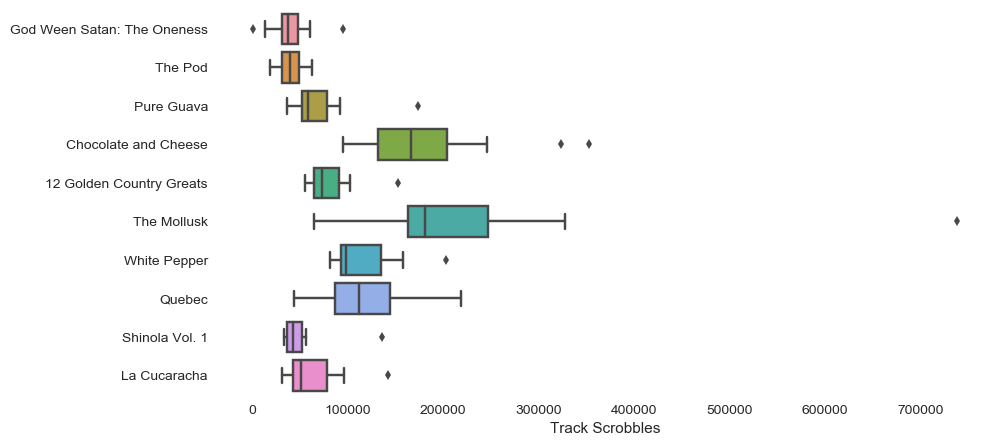

In [365]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
#plt.suptitle('Album Scrobbles', x=0.2)

sns.boxplot(x=ween["scrobbles"], y=ween["album"])
plt.ylabel('')
plt.xlabel('Track Scrobbles')
#sns.stripplot(x=ween["scrobbles"], y=ween["album"], color="orange", jitter=0.2, size=3.5) #points to show the values
sns.despine(left=True, bottom = True)

In [406]:
#get most popular tracks per album
popular_id = []
for album in ween.album.unique():
    popular_id.append(ween[ween.album == album].sort_values('scrobbles', ascending = False).iloc[-1].name)

pop_df = ween.iloc[popular_id][['year', 'album', 'track',  'scrobbles']]
pop_df.scrobbles = pop_df.scrobbles.astype(int).astype(str)
pop_df.scrobbles = pop_df.scrobbles

table = ff.create_table(pop_df)

table.layout.margin.update({'t':30, 'b':70})
table.layout.update({'title': 'Least Popular Track for each Ween Album'})
table.layout.width=750
py.iplot(table, filename='least popular')

In [90]:
pop_df.iloc[0].track https://www.youtube.com/watch?v=6Se9vvLsVUI

'You Fucked Up'

In [95]:
pop_df.track.iloc[0] = '<a href=”https://www.youtube.com/watch?v=6Se9vvLsVUI”> You Fucked Up</a>'
table = ff.create_table(pop_df)

table.layout.margin.update({'t':30})
table.layout.update({'title': 'Most Popular Track for each Ween Album'})
table.layout.width=750
py.iplot(table, filename='tooth-data-sample')

In [ ]:
<a href=”https://www.youtube.com/watch?v=6Se9vvLsVUI”> You Fucked Up</a>

In [94]:
#get most popular tracks per album
popular_id = []
for album in ween.album.unique():
    popular_id.append(ween[ween.album == album].sort_values('scrobbles', ascending = False).iloc[0].name)

pop_df = ween.iloc[popular_id][['year', 'album', 'track',  'scrobbles']]
pop_df.scrobbles = pop_df.scrobbles.astype(int).astype(str)
pop_df.scrobbles = pop_df.scrobbles

table = ff.create_table(pop_df)

table.layout.margin.update({'t':30})
table.layout.update({'title': 'Most Popular Track for each Ween Album'})
table.layout.width=750
py.iplot(table, filename='tooth-data-sample')


In [377]:
ween[ween.album == 'The Mollusk'].sort_values('scrobbles', ascending = False).iloc[0].name

109

In [324]:
formula = 'scrobbles ~ C(album)'
popu_lm = ols('scrobbles ~ C(album)', data=ween).fit()
table = sm.stats.anova_lm(popu_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

                sum_sq     df          F        PR(>F)
C(album)  6.076171e+11    9.0  19.396789  2.186737e-21
Residual  5.325362e+11  153.0        NaN           NaN


In [317]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


In [328]:
mc = MultiComparison(ween.scrobbles, ween.album)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

                          Multiple Comparison of Means - Tukey HSD,FWER=0.05                         
           group1                      group2             meandiff      lower        upper     reject
-----------------------------------------------------------------------------------------------------
  12 Golden Country Greats      Chocolate and Cheese     97989.9375   21626.6083  174353.2667   True 
  12 Golden Country Greats  God Ween Satan: The Oneness -44098.6207  -113567.6892  25370.4479  False 
  12 Golden Country Greats          La Cucaracha        -17933.0769  -97613.2765   61747.1226  False 
  12 Golden Country Greats           Pure Guava         -13499.4737  -87507.7637   60508.8163  False 
  12 Golden Country Greats             Quebec            38216.6667   -39119.483  115552.8163  False 
  12 Golden Country Greats         Shinola Vol. 1       -31268.3333  -112379.1714  49842.5047  False 
  12 Golden Country Greats          The Mollusk         150675.7143   72242.5432  

In [343]:
no_outlier = ween[ween.track != 'Ocean Man']

In [345]:
no_outl_g = no_outlier.groupby('album').mean()
no_outl_g = no_outl_g.reset_index()

In [300]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Paradigit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



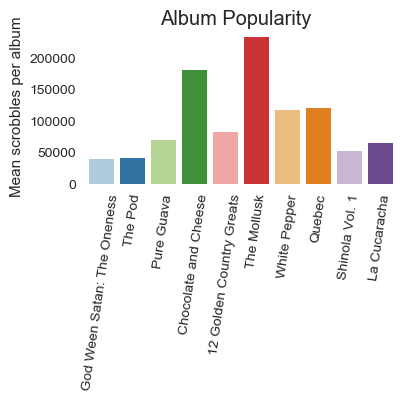

In [352]:
sns.set(rc={'figure.figsize':(4,2)})
sns.set_style("white")
plt.suptitle('Album Popularity')
sns.barplot(x="album", y="scrobbles", data=group, palette="Paired")
plt.xticks(rotation=82)
plt.ylabel('Mean scrobbles per album')
plt.xlabel('')
sns.despine(left=True, bottom = True) #remove border of plot
plt.savefig('alb_popularity')

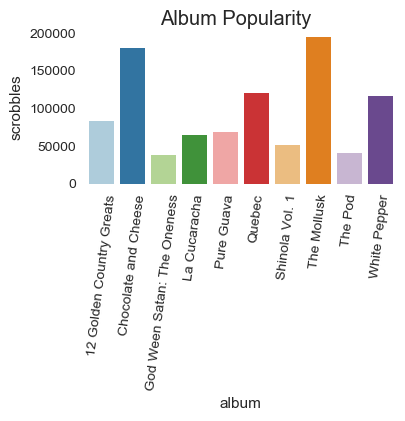

In [346]:
sns.set(rc={'figure.figsize':(4,2)})
sns.set_style("white")
plt.suptitle('Mean album scrobbles (without Ocean Man)')
sns.barplot(x="album", y="scrobbles", data=no_outl_g, palette="Paired")
plt.xticks(rotation=83)
sns.despine(left=True, bottom = True) #remove border of plot
plt.savefig('alb_popularity')

In [ ]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)', data=data).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame

print(table)

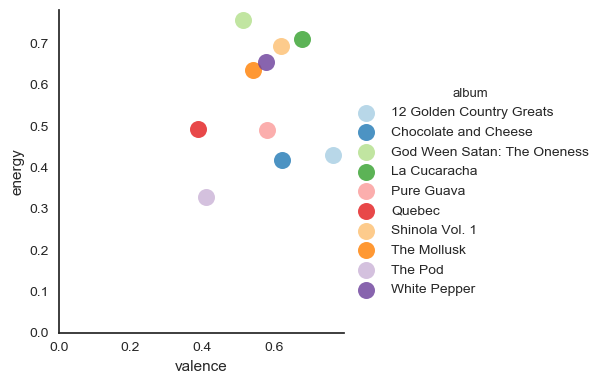

In [160]:

sns.set_style("white")

sns.lmplot( x="valence", y="energy", data=group, hue='album', 
           fit_reg=False, legend=True, size = 4, scatter_kws={'s':150}, palette='Paired' )


# control x and y limits
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()


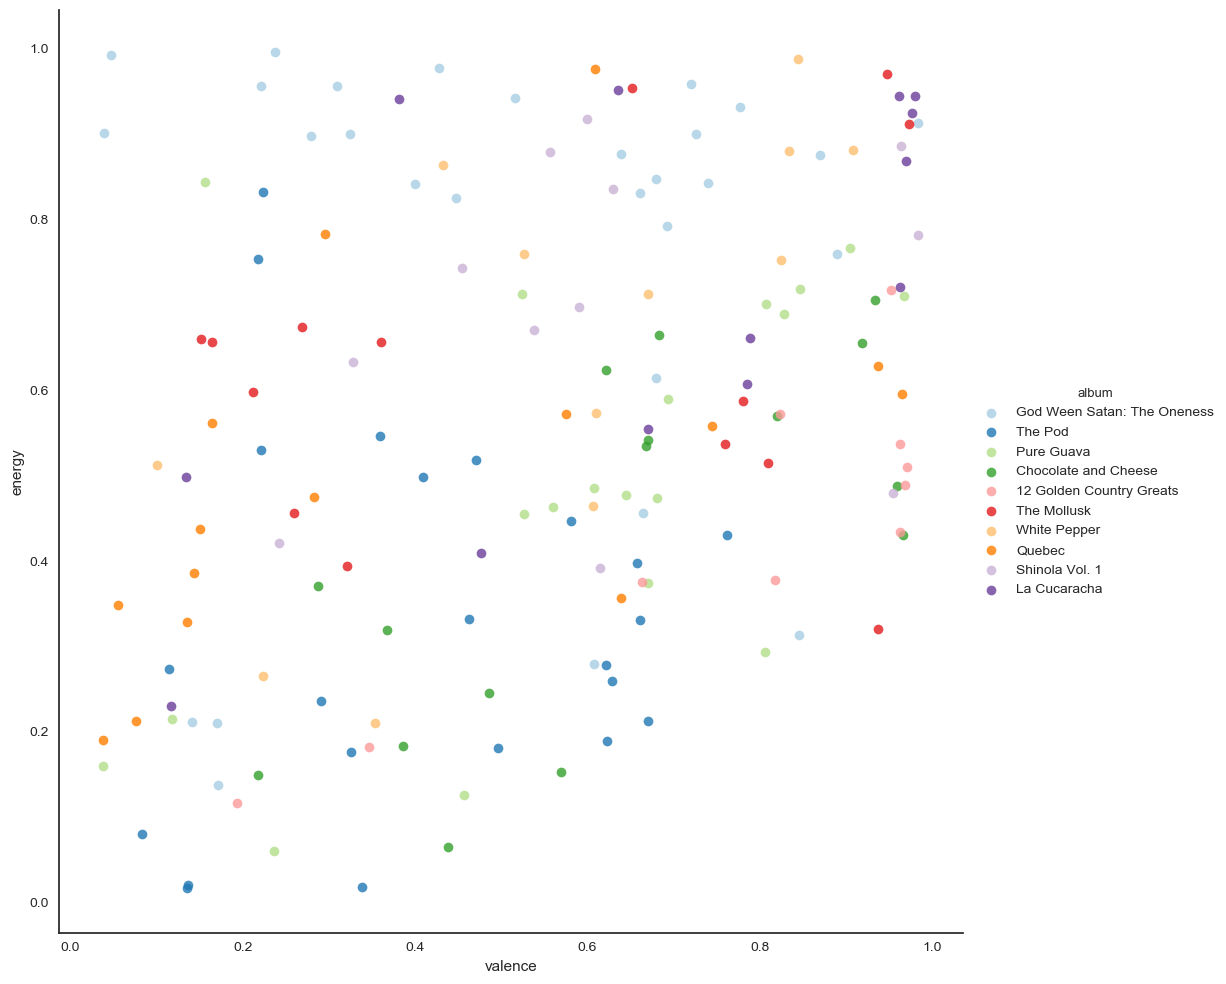

In [161]:
# Tracks: scatterplot for valence & energy ( lmplot = linear model plot)
sns.lmplot( x="valence", y="energy", data=ween, fit_reg=False, hue='album', legend=True, size=10, palette='Paired')
plt.show()


## scatter
This scatter plot show that Ween has a lot of songs scattered on the emotional spectrum.

Check:

- A lot of tracks score quite high on Valence (the most right row)
- Five tracks score really low on valence (on the left )
- And 2 of them score high on energy (so are they angry songs?)

- A bunch of songs grouped together on top right, really energetic and happy!
- What is the song on the right (high valence) but lowest energy? From the mollusk?

- Two tracks from The Pod score low for both valence and energy, which one?
- Two lowest energt songs are from the Pod, which?

In [8]:
ween[(ween['valence'] > 0.9) & (ween['energy'] > 0.9)] 

,album,track_nr,track,duration_ms,energy,valence,year,clean_text
8,God Ween Satan: The Oneness,9,Don't Laugh (i Love You),169307,0.913,0.983,1990,and when the sun it turns to snow and the gras...
107,The Mollusk,11,Waving My Dick In The Wind,131733,0.970,0.948,1997,im waving my dick in the wind im waving my dic...
109,The Mollusk,13,Ocean Man,126947,0.912,0.973,1997,verse ocean man take me by the hand lead me to...
150,La Cucaracha,1,Fiesta,133587,0.945,0.961,2007,instrumental
152,La Cucaracha,3,Friends,246707,0.924,0.976,2007,i dreamt of a move a great move to another pla...
158,La Cucaracha,9,Shamemaker,158933,0.945,0.980,2007,when i feel the shame i get so scared it makes...
163,La Cucaracha,14,Bag Of Fat,157133,0.978,0.980,2007,tonight is my special night nobody looks at me...


In [10]:
#A lot of tracks score quite high on Valence (the most right row)
#let's take cutoff score 0.9 for both values

topright = ween[(ween['valence'] > 0.9) & (ween['energy'] > 0.9)]

print(topright.sort_values('energy', ascending=False)[['album', 'track_nr', 'track', 'energy','valence' ]])

                           album  track_nr                       track  \
163                 La Cucaracha        14                  Bag Of Fat   
107                  The Mollusk        11  Waving My Dick In The Wind   
150                 La Cucaracha         1                      Fiesta   
158                 La Cucaracha         9                  Shamemaker   
152                 La Cucaracha         3                     Friends   
8    God Ween Satan: The Oneness         9    Don't Laugh (i Love You)   
109                  The Mollusk        13                   Ocean Man   

     energy  valence  
163   0.978    0.980  
107   0.970    0.948  
150   0.945    0.961  
158   0.945    0.980  
152   0.924    0.976  
8     0.913    0.983  
109   0.912    0.973  


In [11]:
print('Five tracks score really low on valence (on the left )')
print('the most negative emotion songs:')
print(ween.sort_values('valence', ascending=True).head()['track'])
print()

print('And 2 of them score high on energy (so are they angry songs?)')

print(ween.sort_values('valence', ascending=True).head().sort_values('energy', ascending=False).iloc[:2]['track'])

Five tracks score really low on valence (on the left )
the most negative emotion songs:
61                                              Sarah
135                                        Alcan Road
24                                       Birthday Boy
19                          Mushroom Festival In Hell
137    If You Could Save Yourself (You'd Save Us All)
Name: track, dtype: object

And 2 of them score high on energy (so are they angry songs?)
19    Mushroom Festival In Hell
24                 Birthday Boy
Name: track, dtype: object


In [21]:
#two lowest energt songs are from the Pod, which?
ween.sort_values('energy', ascending=True).head()

#there are actually three! Demon Sweat and Boing are scoring so alike on energy and valence that they overlapped in the graph


,album,track_nr,track,duration_ms,energy,valence,year,clean_text
43,The Pod,15,Boing,93400,0.0175,0.135,1991,it is as smooth as a mutilated shit on a shing...
47,The Pod,19,Alone,192067,0.0185,0.338,1991,when the life inside no doubt has died and you...
37,The Pod,9,Demon Sweat,251040,0.0207,0.137,1991,the sky dripped in a demon sweat the night she...
59,Pure Guava,8,I Play It Off Legit,200467,0.0607,0.236,1992,whereve you been i was out with pat whats she ...
79,Chocolate and Cheese,9,Drifter In The Dark,151667,0.0653,0.438,1994,do you ever walk alone like a drifter in the d...


In [177]:
low = ween.sort_values('energy', ascending=True).head()[['album','track','energy']]
table = ff.create_table(low)

table.layout.margin.update({'t':30, 'b':70})
table.layout.update({'title': 'Lowest Energy'})
table.layout.width=400
py.iplot(table, filename='tooth-data-sample')


In [14]:
print("THREE lowest energt songs are from the Pod, which? \n")
print(ween.sort_values('energy', ascending=True).iloc[:3][['album', 'track_nr', 'track', 'energy','valence' ]])

THREE lowest energt songs are from the Pod, which? 

      album  track_nr        track  energy  valence
43  The Pod        15        Boing  0.0175    0.135
47  The Pod        19        Alone  0.0185    0.338
37  The Pod         9  Demon Sweat  0.0207    0.137


In [15]:
ween[(ween['valence'] > 0.9) & (ween['energy'] > 0.9)]

,album,track_nr,track,duration_ms,energy,valence,year,clean_text
8,God Ween Satan: The Oneness,9,Don't Laugh (i Love You),169307,0.913,0.983,1990,and when the sun it turns to snow and the gras...
107,The Mollusk,11,Waving My Dick In The Wind,131733,0.970,0.948,1997,im waving my dick in the wind im waving my dic...
109,The Mollusk,13,Ocean Man,126947,0.912,0.973,1997,verse ocean man take me by the hand lead me to...
150,La Cucaracha,1,Fiesta,133587,0.945,0.961,2007,instrumental
152,La Cucaracha,3,Friends,246707,0.924,0.976,2007,i dreamt of a move a great move to another pla...
158,La Cucaracha,9,Shamemaker,158933,0.945,0.980,2007,when i feel the shame i get so scared it makes...
163,La Cucaracha,14,Bag Of Fat,157133,0.978,0.980,2007,tonight is my special night nobody looks at me...


In [16]:
print('What is the song on the right (high valence) but lowest energy? From the mollusk? \n')

#energy < 0.4, highest valence

ween[ween['energy'] < 0.4].sort_values('valence', ascending=False).iloc[0]


What is the song on the right (high valence) but lowest energy? From the mollusk? 



album                                                The Mollusk
track_nr                                                       1
track                            I'm Dancing In The Show Tonight
duration_ms                                               115533
energy                                                     0.321
valence                                                    0.937
year                                                        1997
clean_text     are my ribbons tied is my hair in place have i...
Name: 97, dtype: object

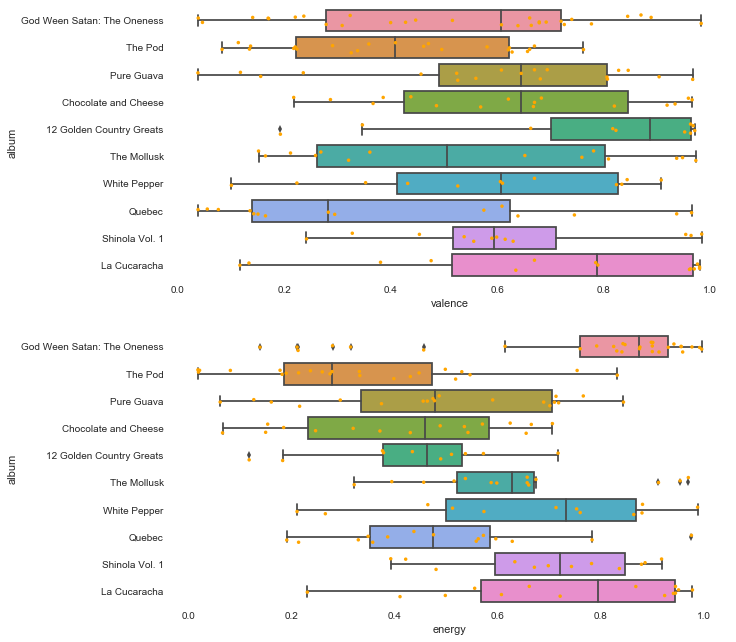

In [219]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set_style("white")
#sns.set_context("paper", font_scale=2, rc={"font.size":3,"axes.labelsize":1})

plt.subplot(211)
sns.boxplot(x=ween["valence"], y=ween["album"] )
sns.stripplot(x=ween["valence"], y=ween["album"], color="orange", jitter=0.2, size=3.5) #points to show the values
sns.despine(left=True, bottom = True)

plt.subplot(212)
sns.boxplot(x=ween["energy"], y=ween["album"] )
sns.stripplot(x=ween["energy"], y=ween["album"], color="orange", jitter=0.2, size=3.5)
sns.despine(left=True, bottom = True)

plt.show()

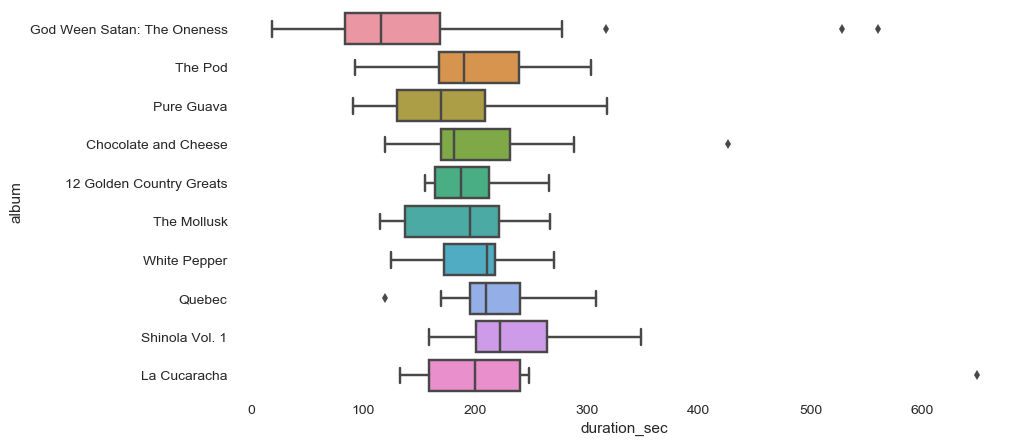

In [407]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
sns.boxplot(x=ween["duration_sec"], y=ween["album"])
#sns.stripplot(x=ween["duration_ms"], y=ween["album"], color="orange", jitter=0.2, size=3.5) #points to show the values
sns.despine(left=True, bottom = True)

In [80]:
#add word count column (length of wordlist)
ween['word_count'] = ween.apply(lambda row: len(row['clean_text'].split()), axis=1)

#add unique words column (lenght of wordlist set)
ween['unique_words'] = ween.apply(lambda row: len(set(row['clean_text'].split())), axis=1)

#add duration in seconds
ween = ween.assign(duration_sec = ween.duration_ms / 1000)

### https://www.r-bloggers.com/everything-in-its-right-place-visualization-and-content-analysis-of-radiohead-lyrics/
#add lexical density 
#a measure of the number of content words as a proportion of the total number of words – a value which ranges from 0 to 100
ween = ween.assign(lex_dens = (ween.unique_words / ween.word_count) * 100)

#lyrical density
#the number of words per second on each track.
ween = ween.assign(lyr_dens =  ween.word_count / ween.duration_sec )

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [85]:
scaler.fit(ween.lyr_dens)

ValueError: Expected 2D array, got 1D array instead:
array=[0.66371907 1.52266289 1.78694875 2.60128606 1.78283824 0.75298505
 0.82417234 2.30045648 0.75602308 1.19296763 1.77321753 1.22233595
 0.96313855 0.60112523 0.98741768 2.09236774 0.75236912 1.60470714
 1.00373521 0.4269802  1.20931113 1.3282707  1.18056561 1.24740125
 1.18533611 0.03962151 0.40277654 0.96969086 0.79421164 0.77522342
 1.11383733 0.26995928 1.00446574 1.10705192 2.19606892 0.64088449
 0.95153227 0.34655832 1.28609316 0.31185031 0.60901592 1.15819209
 0.54763122 0.70663812 0.587365   0.69452185 1.49079755 0.66122759
 0.46959253 0.80726539 1.22697352 0.78863497 1.55450237 0.41089643
 1.01895735 1.31592034 1.276771   0.54641823 0.65879301 1.32690168
 3.26371472 0.44387642 0.68272647 0.57395591 1.38193599 1.00138122
 1.17959026 1.11910364 1.00904662 0.99328189 0.80887872 1.02572633
 0.54385559 0.57444314 1.57171628 0.         0.62166672 1.19065094
 0.62771057 0.59340529 0.85929862 1.3248151  0.2143446  0.51808249
 0.01542888 1.07859532 0.4653723  0.66364386 1.06844079 1.9245177
 1.11831669 0.95939011 1.92136319 1.15925586 1.07643928 0.97149287
 0.41994404 1.55799642 0.98743096 0.88796135 0.75606514 1.21066434
 1.20751134 0.91943803 0.47734072 1.02381299 0.         1.92055142
 0.40848643 1.61484714 0.53851107 0.4536519  0.43209877 0.81341601
 0.86089356 1.19688809 0.         0.78217179 0.68833183 0.44625378
 0.86738037 1.28995657 0.9190922  1.32712443 0.59920767 0.75728155
 0.42009132 0.54761905 0.90909091 0.71134021 1.25       0.27975765
 0.70050761 0.56932367 0.         0.2987013  0.75299922 0.85851231
 1.65026914 1.49786287 0.36908215 0.05124118 1.39878835 0.23146139
 0.22599863 0.52413462 0.6111169  0.70605538 0.72626019 0.43052369
 0.         0.57988575 0.93227999 0.77819522 1.01304468 0.94593699
 0.60644577 0.58593653 0.96896176 0.91002045 0.57895788 0.21892397
 0.90672061].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
scaler.transform(ween.lyr_dens)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [123]:
for feat in ['word_count', 'unique_words', 'lex_dens', 'lyr_dens']:
    print(feat)
    print(ween.sort_values(feat, ascending=False).head(10)[['album','track',feat]])
    print()

word_count
                           album                   track  word_count
20   God Ween Satan: The Oneness              L.m.l.y.p.         639
12   God Ween Satan: The Oneness                  Nicole         540
89      12 Golden Country Greats          Piss Up a Rope         411
66                    Pure Guava          Mourning Glory         375
92      12 Golden Country Greats             Powder Blue         373
38                       The Pod                   Molly         370
34                       The Pod             Pollo Asado         362
138               Shinola Vol. 1  Tastes Good On Th' Bun         340
52                    Pure Guava            Little Birdy         328
163                 La Cucaracha              Bag Of Fat         318

unique_words
                           album                    track  unique_words
20   God Ween Satan: The Oneness               L.m.l.y.p.           208
12   God Ween Satan: The Oneness                   Nicole           177


In [151]:
for feat in ['word_count', 'unique_words', 'lex_dens', 'lyr_dens']:
    print(feat)
    df = ween.sort_values(feat, ascending=True)[['album','track',feat]]
    df = df[df[feat] > 0 ]
    print(df.head(10))
    #print(ween.sort_values(feat, ascending=True).head(10)[['album','track',feat]])
    print()

word_count
                           album                       track  word_count
84          Chocolate and Cheese                The HIV Song           2
141               Shinola Vol. 1                Big Fat Fuck           9
25   God Ween Satan: The Oneness                   Blackjack          11
23   God Ween Satan: The Oneness             Old Man Thunder          24
39                       The Pod      Can U Taste the Waste?          30
144               Shinola Vol. 1        How High Can You Fly          36
82          Chocolate and Cheese                       Candi          52
61                    Pure Guava                       Sarah          58
31                       The Pod                       Frank          61
18   God Ween Satan: The Oneness  Licking The Palm For Guava          61

unique_words
                           album                   track  unique_words
84          Chocolate and Cheese            The HIV Song             2
39                       The P

In [119]:
ween.iloc[57].clean_text

'smack dab in the middle of a situation overlooked by fools tables turned lessons learned you get burned for playin by the rules time is lost thats the cost oh brother you got shit on in the end scrape for a dollar youll die smilin learnin the same lessons once again  the goin gets tough from the get go go man go oh brother not another motherfucker gotta go now'

In [94]:
ween

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,duration_sec,lex_dens,lyr_dens
0,God Ween Satan: The Oneness,1,You Fucked Up,97933,0.996,0.2370,1990,you fucked up by ween you fucked up you bitch...,65,23,97.933,35.384615,0.663719
1,God Ween Satan: The Oneness,2,Tick,112960,0.847,0.6790,1990,i feel a tick in my head and hes sucking on my...,172,79,112.960,45.930233,1.522663
2,God Ween Satan: The Oneness,3,I'm In The Mood To Move,76667,0.279,0.6080,1990,im in the mood to move to the left three feet ...,137,60,76.667,43.795620,1.786949
3,God Ween Satan: The Oneness,4,I Gots A Weasel,82267,0.876,0.6390,1990,got a weasel its a teazel mah pleazel mah p...,214,44,82.267,20.560748,2.601286
4,God Ween Satan: The Oneness,5,Fat Lenny,116107,0.900,0.3240,1990,fat lennys gonna walk right into myself fat le...,207,62,116.107,29.951691,1.782838
5,God Ween Satan: The Oneness,6,Cold And Wet,83667,0.956,0.3090,1990,im cold and wet cant you hear what im saying t...,63,39,83.667,61.904762,0.752985
6,God Ween Satan: The Oneness,7,Bumblebee,78867,0.956,0.2210,1990,aahahahahaha yeaaaaa shiiiiit ahahaha oh shit ...,65,39,78.867,60.000000,0.824172
7,God Ween Satan: The Oneness,8,Bumblebee Part 2,83027,0.843,0.7400,1990,what ohho jesus i couldnt hear the echo the ec...,191,67,83.027,35.078534,2.300456
8,God Ween Satan: The Oneness,9,Don't Laugh (i Love You),169307,0.913,0.9830,1990,and when the sun it turns to snow and the gras...,128,51,169.307,39.843750,0.756023
9,God Ween Satan: The Oneness,10,Never Squeal,146693,0.831,0.6610,1990,never squeal on th pusher dont lie to your mam...,175,66,146.693,37.714286,1.192968


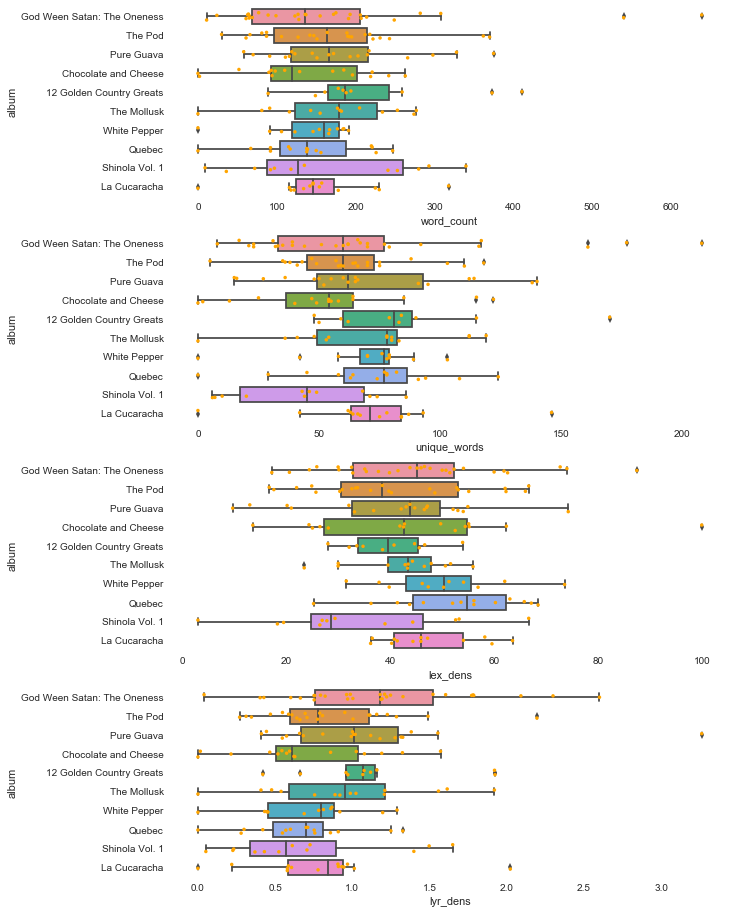

In [209]:
sns.set(rc={'figure.figsize':(10,16)})
sns.set_style("white")
#sns.set_context("paper", font_scale=2, rc={"font.size":3,"axes.labelsize":1})

plt.subplot(411)
sns.boxplot(x=ween["word_count"], y=ween["album"] )
sns.stripplot(x=ween["word_count"], y=ween["album"], color="orange", jitter=0.2, size=3.5) #points to show the values
sns.despine(left=True, bottom = True)

plt.subplot(412)
sns.boxplot(x=ween["unique_words"], y=ween["album"] )
sns.stripplot(x=ween["unique_words"], y=ween["album"], color="orange", jitter=0.2, size=3.5)
sns.despine(left=True, bottom = True)

plt.subplot(413)
sns.boxplot(x=ween["lex_dens"], y=ween["album"] )
sns.stripplot(x=ween["lex_dens"], y=ween["album"], color="orange", jitter=0.2, size=3.5)
sns.despine(left=True, bottom = True)

plt.subplot(414)
sns.boxplot(x=ween["lyr_dens"], y=ween["album"] )
sns.stripplot(x=ween["lyr_dens"], y=ween["album"], color="orange", jitter=0.2, size=3.5)
sns.despine(left=True, bottom = True)


plt.show() 

In [185]:
#unique words per album
uniq = []
u_alb = []
u_year = []

for album in ween['album'].unique():
    alb = ween[ween['album'] == album]
    alb['clean_text']

    alb_words = []
    for text in alb['clean_text']:
        for word in text.split():
            alb_words.append(word)
            
    alb_uniq = len(set(alb_words))
    uniq.append(alb_uniq)
    u_alb.append(album)


    #print(album, len(set(alb_words)))
    
unique_df = pd.DataFrame({'album': u_alb,
                         'unique_words': uniq})
group['total_unique'] = uniq

In [181]:
group.head()

,album,track_nr,duration_ms,energy,valence,year,scrobbles,listeners,scr_per_lis,total_unique
2,God Ween Satan: The Oneness,15.0,158195.448276,0.756345,0.513810,1990.0,38711.379310,11244.724138,3.338084,702
8,The Pod,12.0,199498.565217,0.328704,0.412500,1991.0,41313.043478,12281.739130,3.302161,338
4,Pure Guava,10.0,176421.157895,0.490300,0.582695,1992.0,69310.526316,19373.684211,3.494560,569
1,Chocolate and Cheese,8.5,205941.687500,0.418894,0.624437,1994.0,180799.937500,45350.000000,3.910326,729
0,12 Golden Country Greats,5.5,195777.200000,0.431200,0.766000,1996.0,82810.000000,22250.000000,3.669018,1010


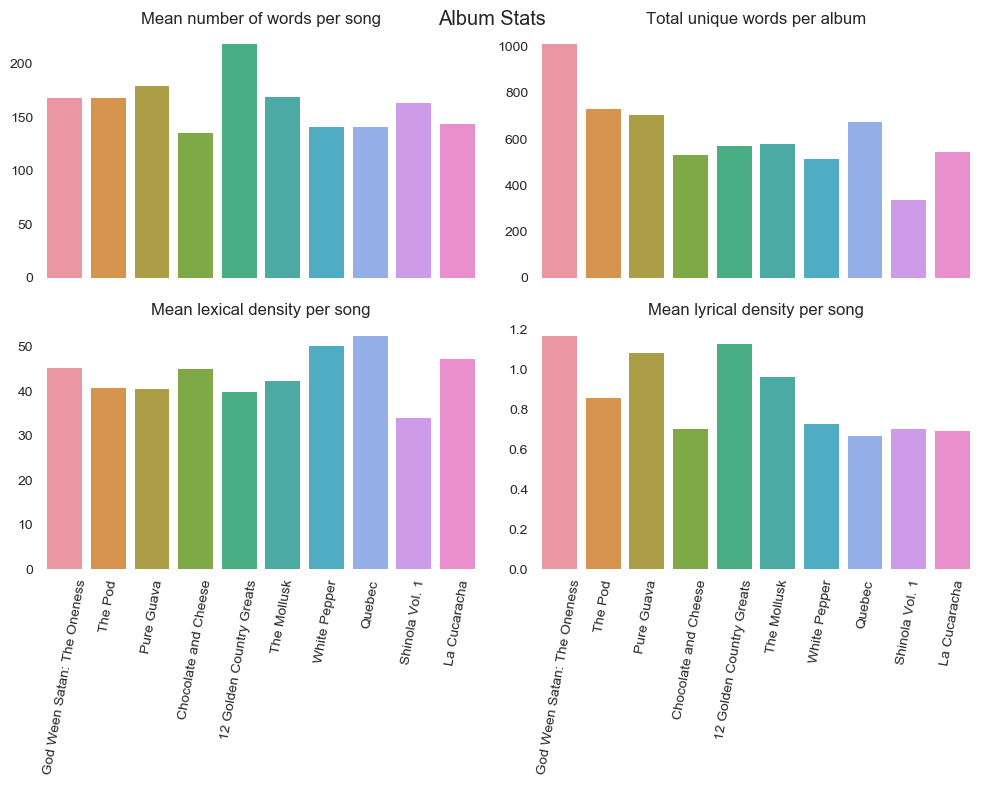

In [408]:
group = group.sort_values('year')

sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")
plt.suptitle('Album Stats')
ax1 = plt.subplot(221)
sns.barplot(x="album", y="word_count", data=group)
ax1.set_title('Mean number of words per song') #subplottile
ax1.set_xticklabels([])
ax1.set_xlabel('') #remove axis labels
ax1.set_ylabel('') #remove axis labels
sns.despine(left=True, bottom = True) #remove border of plot

#This one has different data source!! total unique words per album (cell above)
ax2 = plt.subplot(222)
sns.barplot(x="album", y="total_unique", data=group, ci='sd')
ax2.set_title('Total unique words per album') #subplottile
sns.despine(left=True, bottom = True)
ax2.set_xticklabels([])
#remove axis labels
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3 = plt.subplot(223)
sns.barplot(x="album", y="lex_dens", data=group)
ax3.set_title('Mean lexical density per song') #subplottile
plt.xticks(rotation=80)
ax3.set_xlabel('') #remove axis labels
ax3.set_ylabel('') #remove axis labels
sns.despine(left=True, bottom = True) #remove border of plot

ax4 = plt.subplot(224)
sns.barplot(x="album", y="lyr_dens", data=group)
ax4.set_title('Mean lyrical density per song') #subplottile
sns.despine(left=True, bottom = True)
plt.xticks(rotation=80)
#remove axis labels
ax4.set_xlabel('')
ax4.set_ylabel('')

plt.tight_layout()


# Similar Lyrics

In [293]:
text = ween['clean_text']

In [41]:
def check_common_count(a,b,top=5):
    tr1_words = ween.iloc[a]['clean_text'].split()
    tr2_words = ween.iloc[b]['clean_text'].split()
    
    common = set(tr1_words).intersection( set(tr2_words) )
    
    dic1 = {}
    dic2 = {}

    for word in tr1_words:
        if word in common:

            if word in dic1:
                dic1[word] += 1
            else:
                dic1[word] = 1

    for word in tr2_words:
        if word in common:

            if word in dic2:
                dic2[word] += 1
            else:
                dic2[word] = 1
    
    a_top = sorted(dic1.items(), key = lambda kv: kv[1], reverse=True)[:top]
    b_top = sorted(dic2.items(), key = lambda kv: kv[1], reverse=True)[:top]
    
    print(a_top)
    print()
    print(b_top)

In [57]:
#TFIDF
tfidf_vect = TfidfVectorizer(stop_words = stopwords)
X_tfidf = tfidf_vect.fit_transform(text)
CS_tfidf = (cosine_similarity(X_tfidf))

cos_l = []

for i in range(len(CS_tfidf)):
    sim = np.sort(CS_tfidf[i])[-2]
    arg = CS_tfidf[i].argsort()[-2]
    cos_l.append((sim, arg, i))
    
    
cos_l.sort()
top = cos_l[-30:]   

i = 1
for cos in reversed(top):
    tr_1 = ween.iloc[cos[1]].track
    tr_2 = ween.iloc[cos[2]].track
    sim = cos[0]
    
    print(i, cos[1], tr_1, cos[2], tr_2, sim)
    check_common_count(cos[1],cos[2],top=10)
    print()
    i+=1

1 75 A Tear For Eddie 150 Fiesta 1.0
[('instrumental', 1)]

[('instrumental', 1)]

2 75 A Tear For Eddie 116 Ice Castles 1.0
[('instrumental', 1)]

[('instrumental', 1)]

3 75 A Tear For Eddie 75 A Tear For Eddie 1.0
[('instrumental', 1)]

[('instrumental', 1)]

4 51 The Stallion - pt2. 33 The Stallion - pt1. 0.7857861640464976
[('stallion', 34), ('i', 29), ('the', 24), ('am', 16), ('mang', 13), ('you', 8), ('can', 5), ('know', 3), ('that', 3), ('to', 3)]

[('stallion', 19), ('the', 18), ('you', 11), ('mang', 8), ('i', 7), ('of', 6), ('a', 4), ('who', 4), ('see', 4), ('can', 3)]

5 33 The Stallion - pt1. 51 The Stallion - pt2. 0.7857861640464976
[('stallion', 19), ('the', 18), ('you', 11), ('mang', 8), ('i', 7), ('of', 6), ('a', 4), ('who', 4), ('see', 4), ('can', 3)]

[('stallion', 34), ('i', 29), ('the', 24), ('am', 16), ('mang', 13), ('you', 8), ('can', 5), ('know', 3), ('that', 3), ('to', 3)]

6 50 Pork Roll Eggs and Cheese 31 Frank 0.47787928839480803
[('you', 18), ('please', 16),

In [53]:
check_common_count(51,33,top=10)

[('stallion', 34), ('i', 29), ('the', 24), ('am', 16), ('mang', 13), ('you', 8), ('can', 5), ('know', 3), ('that', 3), ('to', 3)]

[('stallion', 19), ('the', 18), ('you', 11), ('mang', 8), ('i', 7), ('of', 6), ('a', 4), ('who', 4), ('see', 4), ('can', 3)]


In [56]:
stopwords = ['the']
count_vect = CountVectorizer(stop_words='english')
X_count_vect = count_vect.fit_transform(text)
CS_count_vect = (cosine_similarity(X_count_vect))

count_l = []

for i in range(len(CS_count_vect)):
    sim = np.sort(CS_count_vect[i])[-2]
    arg = CS_count_vect[i].argsort()[-2]
    
    count_l.append((sim, arg, i))
    
count_l.sort()
top = count_l[-40:]

i = 1

tr1_l = []
tr2_l = []
sim_l = []

for cos in reversed(top):
    tr_1 = ween.iloc[cos[1]].track
    tr_2 = ween.iloc[cos[2]].track
    sim = cos[0]
    
    tr1_l.append(tr_1)
    tr2_l.append(tr_2)
    sim_l.append(sim)
    
    print(i, cos[1], tr_1, cos[2], tr_2, sim)
    i+=1

df = pd.DataFrame({'Track_1': tr1_l,
                  'Track_2': tr2_l,
                  'Similarity_score': sim_l})

df = df.iloc[[4,6,7,9,11,14,15,17,19,21,24]].reset_index().drop(columns='index')
df['Rank'] = df.index +1
df

1 75 A Tear For Eddie 150 Fiesta 1.0
2 75 A Tear For Eddie 116 Ice Castles 1.0
3 75 A Tear For Eddie 75 A Tear For Eddie 1.0
4 51 The Stallion - pt2. 33 The Stallion - pt1. 0.7896572334066833
5 33 The Stallion - pt1. 51 The Stallion - pt2. 0.7896572334066833
6 156 The Fruit Man 109 Ocean Man 0.5890312556071369
7 109 Ocean Man 156 The Fruit Man 0.5890312556071369
8 109 Ocean Man 161 Woman And Man 0.5128268297196151
9 75 A Tear For Eddie 106 Pink Eye - On My Leg 0.5
10 90 I Don't Wanna Leave You On the Farm 9 Never Squeal 0.48691658124450277
11 9 Never Squeal 90 I Don't Wanna Leave You On the Farm 0.48691658124450277
12 50 Pork Roll Eggs and Cheese 31 Frank 0.44852957753680395
13 31 Frank 50 Pork Roll Eggs and Cheese 0.44852957753680395
14 151 Blue Balloon 92 Powder Blue 0.44190354168922463
15 92 Powder Blue 151 Blue Balloon 0.44190354168922463
16 53 Tender Situation 39 Can U Taste the Waste? 0.43008266445637633
17 39 Can U Taste the Waste? 53 Tender Situation 0.43008266445637633
18 141 

,Similarity_score,Track_1,Track_2,Rank
0,0.789657,The Stallion - pt1.,The Stallion - pt2.,1
1,0.589031,Ocean Man,The Fruit Man,2
2,0.512827,Ocean Man,Woman And Man,3
3,0.486917,I Don't Wanna Leave You On the Farm,Never Squeal,4
4,0.448530,Pork Roll Eggs and Cheese,Frank,5
5,0.441904,Powder Blue,Blue Balloon,6
6,0.430083,Tender Situation,Can U Taste the Waste?,7
7,0.426206,Big Fat Fuck,Fat Lenny,8
8,0.419330,Demon Sweat,Cold And Wet,9
9,0.415854,Baby Bitch,L.m.l.y.p.,10


In [50]:
stopwords = ['the','a', ]
count_vect = CountVectorizer(stop_words=stopwords)
X_count_vect = count_vect.fit_transform(text)
CS_count_vect = (cosine_similarity(X_count_vect))

count_l = []

for i in range(len(CS_count_vect)):
    sim = np.sort(CS_count_vect[i])[-2]
    arg = CS_count_vect[i].argsort()[-2]
    
    count_l.append((sim, arg, i))
    
count_l.sort()
top = count_l[-20:]

i = 1

tr1_l = []
tr2_l = []
sim_l = []

for cos in reversed(top):
    tr_1 = ween.iloc[cos[1]].track
    tr_2 = ween.iloc[cos[2]].track
    sim = cos[0]
    
    tr1_l.append(tr_1)
    tr2_l.append(tr_2)
    sim_l.append(sim)
    
    print(i, cos[1], tr_1, cos[2], tr_2, sim)
    i+=1

1 75 A Tear For Eddie 150 Fiesta 1.0
2 75 A Tear For Eddie 116 Ice Castles 1.0
3 75 A Tear For Eddie 75 A Tear For Eddie 1.0
4 51 The Stallion - pt2. 33 The Stallion - pt1. 0.7081847564866902
5 33 The Stallion - pt1. 51 The Stallion - pt2. 0.7081847564866902
6 58 Reggaejunkiejew 17 Nan 0.6611800443072524
7 17 Nan 58 Reggaejunkiejew 0.6611800443072524
8 50 Pork Roll Eggs and Cheese 31 Frank 0.6497937490032162
9 31 Frank 50 Pork Roll Eggs and Cheese 0.6497937490032162
10 17 Nan 20 L.m.l.y.p. 0.6486954789340633
11 32 Sorry Charlie 24 Birthday Boy 0.6450120323967012
12 24 Birthday Boy 32 Sorry Charlie 0.6450120323967012
13 17 Nan 8 Don't Laugh (i Love You) 0.6268395780238731
14 17 Nan 61 Sarah 0.6260271620122263
15 24 Birthday Boy 5 Cold And Wet 0.6244139179891919
16 58 Reggaejunkiejew 120 Stay Forever 0.6225204517386699
17 58 Reggaejunkiejew 95 You Were the Fool 0.6213706261470139
18 8 Don't Laugh (i Love You) 113 Even If You Don't 0.6100400792112082
19 17 Nan 62 Springtheme 0.60606364779

# Sentiment analysis

https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/

In [260]:
import nltk
from pprint import pprint

NLTK’s built-in Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

We can utilize this tool by first creating a Sentiment Intensity Analyzer (SIA) to categorize our headlines, then we'll use the polarity_scores method to get the sentiment.

We'll append each sentiment dictionary to a results list, which we'll transform into a dataframe:

In [252]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

C:\Users\Paradigit\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [294]:


sia = SIA()
results = []

for i, line in enumerate(ween['clean_text']):
    pol_score = sia.polarity_scores(line)
    pol_score['track'] = ween.iloc[i]['track']
    results.append(pol_score)

pprint(results[:3], width=120)

[{'compound': -0.9969, 'neg': 0.576, 'neu': 0.385, 'pos': 0.04, 'track': 'You Fucked Up'},
 {'compound': -0.9966, 'neg': 0.321, 'neu': 0.646, 'pos': 0.032, 'track': 'Tick'},
 {'compound': 0.9432, 'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'track': "I'm In The Mood To Move"}]


In [295]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,neg,neu,pos,track
0,-0.9969,0.576,0.385,0.040,You Fucked Up
1,-0.9966,0.321,0.646,0.032,Tick
2,0.9432,0.000,0.863,0.137,I'm In The Mood To Move
3,0.2960,0.000,0.988,0.012,I Gots A Weasel
4,0.9709,0.000,0.885,0.115,Fat Lenny


In [296]:
pn = df[['neg', 'pos']]

In [297]:
ween = pd.concat([ween, pn], axis=1)

In [288]:
ween

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,duration_sec,lex_dens,lyr_dens,neg,pos
0,God Ween Satan: The Oneness,1,You Fucked Up,97933,0.996,0.237,1990,you fucked up by ween you fucked up you bitch...,65,23,97.933,35.384615,0.663719,0.576,0.040
1,God Ween Satan: The Oneness,2,Tick,112960,0.847,0.679,1990,i feel a tick in my head and hes sucking on my...,172,79,112.960,45.930233,1.522663,0.321,0.032
2,God Ween Satan: The Oneness,3,I'm In The Mood To Move,76667,0.279,0.608,1990,im in the mood to move to the left three feet ...,137,60,76.667,43.795620,1.786949,0.000,0.137
3,God Ween Satan: The Oneness,4,I Gots A Weasel,82267,0.876,0.639,1990,got a weasel its a teazel mah pleazel mah p...,214,44,82.267,20.560748,2.601286,0.000,0.012
4,God Ween Satan: The Oneness,5,Fat Lenny,116107,0.900,0.324,1990,fat lennys gonna walk right into myself fat le...,207,62,116.107,29.951691,1.782838,0.000,0.115


In [276]:
df.sort_values('neg', ascending=False).head(20)

,compound,neg,neu,pos,track
0,-0.9969,0.576,0.385,0.040,You Fucked Up
13,-0.9963,0.568,0.405,0.026,Common Bitch
141,-0.6705,0.483,0.345,0.172,Big Fat Fuck
39,-0.9413,0.483,0.517,0.000,Can U Taste the Waste?
8,-0.9962,0.406,0.497,0.098,Don't Laugh (i Love You)
68,-0.9974,0.405,0.595,0.000,Hey Fat Boy (Asshole)
60,-0.9980,0.321,0.535,0.145,Pumpin' 4 the Man
1,-0.9966,0.321,0.646,0.032,Tick
72,-0.9824,0.316,0.573,0.111,Spinal Meningitis (Got Me Down)
58,-0.9958,0.302,0.604,0.094,Reggaejunkiejew


In [298]:
df.sort_values('pos', ascending=False).head()

,compound,neg,neu,pos,track
138,0.9998,0.000,0.475,0.525,Tastes Good On Th' Bun
152,0.9989,0.031,0.554,0.415,Friends
157,0.9921,0.010,0.623,0.367,Spirit Walker
45,0.9849,0.064,0.571,0.365,Oh My Dear (Falling In Love)
67,0.9954,0.137,0.507,0.356,Loving U Thru It All


Our dataframe consists of four columns from the sentiment scoring: Neu, Neg, Pos and compound. The first three represent the sentiment score percentage of each category in our headline, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

We will consider posts with a compound value greater than 0.2 as positive and less than -0.2 as negative. There's some testing and experimentation that goes with choosing these ranges, and there is a trade-off to be made here. If you choose a higher value, you might get more compact results (less false positives and false negatives), but the size of the results will decrease significantly.


In [315]:
posdf = ween[ween['pos'] >= 0.25]
negdf = ween[ween['neg'] >= 0.25]

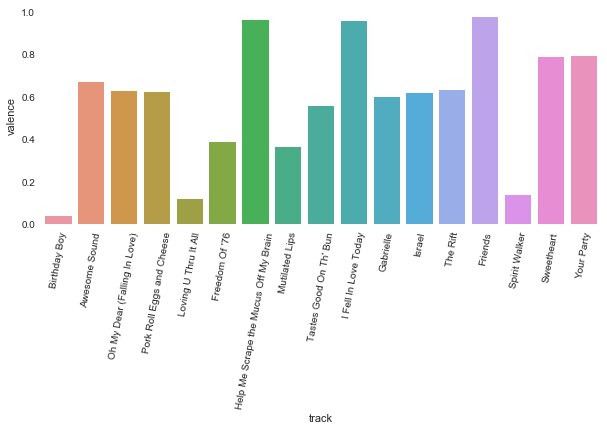

In [314]:
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
ax1 = plt.subplot()
sns.barplot(x="track", y="valence", data=posdf)
#ax1.set_title('Mean number of words per song') #subplottile
#ax1.set_xticklabels([])
#ax1.set_xlabel('') #remove axis labels
#ax1.set_ylabel('') #remove axis labels
plt.xticks(rotation=80)
sns.despine(left=True, bottom = True) #remove border of plot

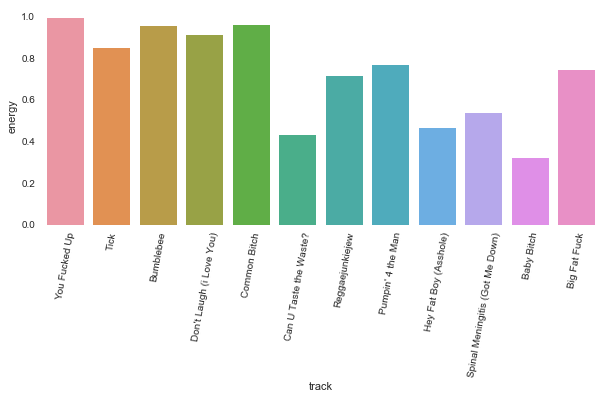

In [319]:
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("white")
ax1 = plt.subplot()
sns.barplot(x="track", y="energy", data=negdf)
#ax1.set_title('Mean number of words per song') #subplottile
#ax1.set_xticklabels([])
#ax1.set_xlabel('') #remove axis labels
#ax1.set_ylabel('') #remove axis labels
plt.xticks(rotation=80)
sns.despine(left=True, bottom = True) #remove border of plot

Using both energy and valence, we can create an equation for the “Sonic Anger Index” by calculating the geometric mean of energy and 1 - valence (subtracting valence from 1 so that a higher value means it’s more “negative”). This way, the most angry songs will be those that are both high in energy and low in valence, while equally weighting both.

In [304]:
#sonig anger 
ween['sonic_anger'] = ween.apply(lambda row: math.sqrt(row['energy'] * (1 - row['valence'])), axis=1) 



In [305]:
ween.sort_values('sonic_anger', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,scrobbles,listeners,scr_per_lis,word_count,unique_words,duration_sec,lex_dens,lyr_dens,sonic_anger
19,God Ween Satan: The Oneness,20,Mushroom Festival In Hell,161600,0.9920,0.0467,1990,the wind is howling and the time is right for ...,38700.0,11800.0,3.279661,69,35,161.600,50.724638,0.426980,0.972458
24,God Ween Satan: The Oneness,25,Birthday Boy,210067,0.9010,0.0388,1990,jesus christ pain take one yeah pain last tim...,61300.0,13600.0,4.507353,249,116,210.067,46.586345,1.185336,0.930613
0,God Ween Satan: The Oneness,1,You Fucked Up,97933,0.9960,0.2370,1990,you fucked up by ween you fucked up you bitch...,95100.0,23500.0,4.046809,65,23,97.933,35.384615,0.663719,0.871750
6,God Ween Satan: The Oneness,7,Bumblebee,78867,0.9560,0.2210,1990,aahahahahaha yeaaaaa shiiiiit ahahaha oh shit ...,48400.0,13800.0,3.507246,65,39,78.867,60.000000,0.824172,0.862974
66,Pure Guava,15,Mourning Glory,317907,0.8440,0.1560,1992,unintelligible coughing i swear to god look th...,37200.0,13200.0,2.818182,375,138,317.907,36.800000,1.179590,0.844000
5,God Ween Satan: The Oneness,6,Cold And Wet,83667,0.9560,0.3090,1990,im cold and wet cant you hear what im saying t...,31700.0,10100.0,3.138614,63,39,83.667,61.904762,0.752985,0.812771
14,God Ween Satan: The Oneness,15,El Camino,137733,0.8980,0.2790,1990,el camino blazing down the road el camino ah s...,38700.0,12100.0,3.198347,136,70,137.733,51.470588,0.987418,0.804648
46,The Pod,18,Sketches of Winkle,163000,0.8320,0.2240,1991,well she danced like a floozie in a hot tub of...,40500.0,11500.0,3.521739,243,88,163.000,36.213992,1.490798,0.803512
4,God Ween Satan: The Oneness,5,Fat Lenny,116107,0.9000,0.3240,1990,fat lennys gonna walk right into myself fat le...,59500.0,15700.0,3.789809,207,62,116.107,29.951691,1.782838,0.780000
38,The Pod,10,Molly,287693,0.7540,0.2180,1991,tell me what you want and ill give it to you y...,34000.0,11100.0,3.063063,370,65,287.693,17.567568,1.286093,0.767872


In [340]:
#geometric mean of valence and positivity of lyrics
ween['good'] = ween.apply(lambda row: math.sqrt(row['valence'] * row['pos']), axis=1) 
ween.sort_values('good', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,duration_sec,lex_dens,lyr_dens,neg,pos,sonic_anger,good
152,La Cucaracha,3,Friends,246707,0.9240,0.9760,2007,i dreamt of a move a great move to another pla...,230,84,246.707,36.521739,0.932280,0.031,0.415,0.148916,0.636428
140,Shinola Vol. 1,3,I Fell In Love Today,249267,0.4800,0.9540,2005,i got nothing to lose i saw the sun in may ive...,92,49,249.267,53.260870,0.369082,0.000,0.316,0.148593,0.549057
138,Shinola Vol. 1,1,Tastes Good On Th' Bun,206027,0.8790,0.5560,2005,tastes good on th bun tastes good on th bun ta...,340,10,206.027,2.941176,1.650269,0.000,0.525,0.624721,0.540278
94,12 Golden Country Greats,8,Help Me Scrape the Mucus Off My Brain,165360,0.5370,0.9630,1996,i guess its somethin in my brain i need whiske...,178,83,165.360,46.629213,1.076439,0.178,0.260,0.140957,0.500380
159,La Cucaracha,10,Sweetheart,195600,0.6070,0.7850,2007,shes a sweetheart in the summer summertime is ...,178,84,195.600,47.191011,0.910020,0.015,0.318,0.361255,0.499630
162,La Cucaracha,13,Your Party,248147,0.6610,0.7890,2007,there were beverages laid out for the party th...,225,93,248.147,41.333333,0.906721,0.021,0.300,0.373458,0.486518
45,The Pod,17,Oh My Dear (Falling In Love),116627,0.2590,0.6280,1991,tell me where you come from was it heaven abov...,81,43,116.627,53.086420,0.694522,0.064,0.365,0.310400,0.478769
163,La Cucaracha,14,Bag Of Fat,157133,0.9780,0.9800,2007,tonight is my special night nobody looks at me...,318,146,157.133,45.911950,2.023763,0.026,0.230,0.139857,0.474763
130,Quebec,8,Hey There Fancypants,120000,0.5960,0.9650,2003,hey there fancypants play the songs that make ...,150,78,120.000,52.000000,1.250000,0.136,0.213,0.144430,0.453371
41,The Pod,13,Awesome Sound,141600,0.2130,0.6700,1991,got an awesome sound going down got an awesome...,164,36,141.600,21.951220,1.158192,0.041,0.299,0.265123,0.447582


In [341]:
#geometric mean of 1 - valence and negativity of lyrics
ween['bad'] = ween.apply(lambda row: math.sqrt((1- row['valence']) * row['neg']), axis=1) 
ween.sort_values('bad', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,duration_sec,lex_dens,lyr_dens,neg,pos,sonic_anger,good,bad
0,God Ween Satan: The Oneness,1,You Fucked Up,97933,0.9960,0.2370,1990,you fucked up by ween you fucked up you bitch...,65,23,97.933,35.384615,0.663719,0.576,0.040,0.871750,0.097365,0.662939
141,Shinola Vol. 1,4,Big Fat Fuck,175640,0.7430,0.4540,2005,big fat fuck feelin like a big fat fuck,9,6,175.640,66.666667,0.051241,0.483,0.172,0.636929,0.279442,0.513535
6,God Ween Satan: The Oneness,7,Bumblebee,78867,0.9560,0.2210,1990,aahahahahaha yeaaaaa shiiiiit ahahaha oh shit ...,65,39,78.867,60.000000,0.824172,0.265,0.026,0.862974,0.075802,0.454351
68,Pure Guava,17,Hey Fat Boy (Asshole),114960,0.4630,0.5600,1992,hey fat boy come here you killed my mother im...,116,15,114.960,12.931034,1.009047,0.405,0.000,0.451354,0.000000,0.422137
42,The Pod,14,Laura,275733,0.2360,0.2910,1991,dudn dudn dudn dudn dudn dudn dudn dudn the g...,151,60,275.733,39.735099,0.547631,0.235,0.024,0.409053,0.083570,0.408185
77,Chocolate and Cheese,7,Baby Bitch,183933,0.3190,0.3670,1994,its been a while since ive seen you smile but ...,219,115,183.933,52.511416,1.190651,0.260,0.160,0.449363,0.242322,0.405685
13,God Ween Satan: The Oneness,14,Common Bitch,106467,0.9590,0.7200,1990,let me tell you bout the fucking bitch deaner ...,64,32,106.467,50.000000,0.601125,0.568,0.026,0.518189,0.136821,0.398798
47,The Pod,19,Alone,192067,0.0185,0.3380,1991,when the life inside no doubt has died and you...,127,70,192.067,55.118110,0.661228,0.230,0.030,0.110666,0.100698,0.390205
126,Quebec,4,Among His Tribe,219000,0.2130,0.0765,2003,he would step out of the night and light a fir...,92,58,219.000,63.043478,0.420091,0.156,0.033,0.443515,0.050244,0.379560
19,God Ween Satan: The Oneness,20,Mushroom Festival In Hell,161600,0.9920,0.0467,1990,the wind is howling and the time is right for ...,69,35,161.600,50.724638,0.426980,0.151,0.104,0.972458,0.069691,0.379405


In [346]:
# geometric mean of energy , 1 - valence and negative words
ween['bad_force'] = ween.apply(lambda row: ((1-row['valence']) * row['energy'] * row['neg']) ** (1/3), axis=1) 
ween.sort_values('bad_force', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,duration_sec,lex_dens,lyr_dens,neg,pos,sonic_anger,good,bad,bad_force,good_force
0,God Ween Satan: The Oneness,1,You Fucked Up,97933,0.996,0.2370,1990,you fucked up by ween you fucked up you bitch...,65,23,97.933,35.384615,0.663719,0.576,0.040,0.871750,0.097365,0.662939,0.759280,0.211360
6,God Ween Satan: The Oneness,7,Bumblebee,78867,0.956,0.2210,1990,aahahahahaha yeaaaaa shiiiiit ahahaha oh shit ...,65,39,78.867,60.000000,0.824172,0.265,0.026,0.862974,0.075802,0.454351,0.582211,0.176444
141,Shinola Vol. 1,4,Big Fat Fuck,175640,0.743,0.4540,2005,big fat fuck feelin like a big fat fuck,9,6,175.640,66.666667,0.051241,0.483,0.172,0.636929,0.279442,0.513535,0.580822,0.387131
13,God Ween Satan: The Oneness,14,Common Bitch,106467,0.959,0.7200,1990,let me tell you bout the fucking bitch deaner ...,64,32,106.467,50.000000,0.601125,0.568,0.026,0.518189,0.136821,0.398798,0.534287,0.261843
19,God Ween Satan: The Oneness,20,Mushroom Festival In Hell,161600,0.992,0.0467,1990,the wind is howling and the time is right for ...,69,35,161.600,50.724638,0.426980,0.151,0.104,0.972458,0.069691,0.379405,0.522684,0.168896
58,Pure Guava,7,Reggaejunkiejew,292960,0.713,0.5240,1992,i dont know where youre comin from but i wish ...,193,91,292.960,47.150259,0.658793,0.302,0.094,0.582570,0.221937,0.379146,0.467988,0.327479
1,God Ween Satan: The Oneness,2,Tick,112960,0.847,0.6790,1990,i feel a tick in my head and hes sucking on my...,172,79,112.960,45.930233,1.522663,0.321,0.032,0.521428,0.147404,0.321000,0.443572,0.264019
161,La Cucaracha,12,Woman And Man,648627,0.941,0.3810,2007,once there was one once there was only one a f...,142,63,648.627,44.366197,0.218924,0.142,0.035,0.763203,0.115477,0.296476,0.435702,0.232378
155,La Cucaracha,6,My Own Bare Hands,165973,0.951,0.6350,2007,i can build an aeroplane that travels over lan...,157,64,165.973,40.764331,0.945937,0.238,0.023,0.589165,0.120851,0.294737,0.435529,0.240378
68,Pure Guava,17,Hey Fat Boy (Asshole),114960,0.463,0.5600,1992,hey fat boy come here you killed my mother im...,116,15,114.960,12.931034,1.009047,0.405,0.000,0.451354,0.000000,0.422137,0.435341,0.000000


In [347]:
# geometric mean of energy , 1 - valence and negative words
ween['bad_slow'] = ween.apply(lambda row: ((1-row['valence']) * (1- row['energy']) * row['neg']) ** (1/3), axis=1) 
ween.sort_values('bad_slow', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,...,lex_dens,lyr_dens,neg,pos,sonic_anger,good,bad,bad_force,good_force,bad_slow
47,The Pod,19,Alone,192067,0.0185,0.3380,1991,when the life inside no doubt has died and you...,127,70,...,55.118110,0.661228,0.230,0.030,0.110666,0.100698,0.390205,0.141227,0.057245,0.530671
59,Pure Guava,8,I Play It Off Legit,200467,0.0607,0.2360,1992,whereve you been i was out with pat whats she ...,266,112,...,42.105263,1.326902,0.178,0.162,0.215348,0.195530,0.368771,0.202100,0.132395,0.503623
42,The Pod,14,Laura,275733,0.2360,0.2910,1991,dudn dudn dudn dudn dudn dudn dudn dudn the g...,151,60,...,39.735099,0.547631,0.235,0.024,0.409053,0.083570,0.408185,0.340049,0.118124,0.503040
126,Quebec,4,Among His Tribe,219000,0.2130,0.0765,2003,he would step out of the night and light a fir...,92,58,...,63.043478,0.420091,0.156,0.033,0.443515,0.050244,0.379560,0.313074,0.081318,0.484000
77,Chocolate and Cheese,7,Baby Bitch,183933,0.3190,0.3670,1994,its been a while since ive seen you smile but ...,219,115,...,52.511416,1.190651,0.260,0.160,0.449363,0.242322,0.405685,0.374446,0.265578,0.482142
68,Pure Guava,17,Hey Fat Boy (Asshole),114960,0.4630,0.5600,1992,hey fat boy come here you killed my mother im...,116,15,...,12.931034,1.009047,0.405,0.000,0.451354,0.000000,0.422137,0.435341,0.000000,0.457398
67,Pure Guava,16,Loving U Thru It All,148333,0.2150,0.1180,1992,loving you through it all thick and thin bad ...,166,16,...,9.638554,1.119104,0.137,0.356,0.435465,0.204959,0.347612,0.296171,0.208252,0.456058
43,The Pod,15,Boing,93400,0.0175,0.1350,1991,it is as smooth as a mutilated shit on a shing...,66,41,...,62.121212,0.706638,0.100,0.181,0.123035,0.156317,0.294109,0.114820,0.075338,0.439659
28,God Ween Satan: The Oneness,29,Puffy Cloud,159907,0.1380,0.1710,1990,drift away on a puffy cloud go away on a puffy...,127,31,...,24.409449,0.794212,0.102,0.000,0.338234,0.000000,0.290789,0.226818,0.000000,0.417722
135,Quebec,13,Alcan Road,308000,0.1900,0.0384,2003,open the gate to the red land alcan road by th...,92,63,...,68.478261,0.298701,0.088,0.047,0.427439,0.042483,0.290897,0.252393,0.069994,0.409249


In [345]:
#good force, not really interesting
ween['good_force'] = ween.apply(lambda row: (row['valence'] * row['energy'] * row['pos']) ** (1/3), axis=1) 
ween.sort_values('good_force', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,word_count,unique_words,duration_sec,lex_dens,lyr_dens,neg,pos,sonic_anger,good,bad,bad_force,good_force
152,La Cucaracha,3,Friends,246707,0.9240,0.9760,2007,i dreamt of a move a great move to another pla...,230,84,246.707,36.521739,0.932280,0.031,0.415,0.148916,0.636428,0.027276,0.088257,0.720648
138,Shinola Vol. 1,1,Tastes Good On Th' Bun,206027,0.8790,0.5560,2005,tastes good on th bun tastes good on th bun ta...,340,10,206.027,2.941176,1.650269,0.000,0.525,0.624721,0.540278,0.000000,0.000000,0.635440
163,La Cucaracha,14,Bag Of Fat,157133,0.9780,0.9800,2007,tonight is my special night nobody looks at me...,318,146,157.133,45.911950,2.023763,0.026,0.230,0.139857,0.474763,0.022804,0.079820,0.604084
162,La Cucaracha,13,Your Party,248147,0.6610,0.7890,2007,there were beverages laid out for the party th...,225,93,248.147,41.333333,0.906721,0.021,0.300,0.373458,0.486518,0.066566,0.143076,0.538848
147,Shinola Vol. 1,10,The Rift,341333,0.8360,0.6300,2005,theres a rift out in space and it could be the...,241,44,341.333,18.257261,0.706055,0.025,0.294,0.556165,0.430372,0.096177,0.197750,0.536988
159,La Cucaracha,10,Sweetheart,195600,0.6070,0.7850,2007,shes a sweetheart in the summer summertime is ...,178,84,195.600,47.191011,0.910020,0.015,0.318,0.361255,0.499630,0.056789,0.125095,0.533124
142,Shinola Vol. 1,5,Gabrielle,209467,0.9180,0.5990,2005,i dont mean to be so insolent but you know its...,293,86,209.467,29.351536,1.398788,0.107,0.273,0.606727,0.404385,0.207140,0.340244,0.531468
140,Shinola Vol. 1,3,I Fell In Love Today,249267,0.4800,0.9540,2005,i got nothing to lose i saw the sun in may ive...,92,49,249.267,53.260870,0.369082,0.000,0.316,0.148593,0.549057,0.000000,0.000000,0.525000
148,Shinola Vol. 1,11,Monique The Freak,348360,0.8860,0.9640,2005,oh mercy girl you lookin sexy movin on across ...,253,68,348.360,26.877470,0.726260,0.197,0.163,0.178595,0.396399,0.084214,0.184530,0.518282
154,La Cucaracha,5,Learnin To Love,144120,0.8680,0.9700,2007,learnin to love loving to learn a handicap at...,146,87,144.120,59.589041,1.013045,0.107,0.161,0.161369,0.395184,0.056657,0.140715,0.513696


In [38]:
ween.sort_values('scrobbles', ascending=False)

,album,track_nr,track,duration_ms,energy,valence,year,clean_text,scrobbles,listeners
54,Pure Guava,3,The Stallion Pt. 3,211000,0.4550,0.5260,1992,mach 10 at sudden speed flying into the wind n...,3390000,938000
33,The Pod,5,The Stallion - pt1.,171627,0.4980,0.4090,1991,you crazy son of a bitch goddamn motherfucker ...,1176000,421000
23,God Ween Satan: The Oneness,24,Old Man Thunder,19240,0.3140,0.8450,1990,old man thunder sound of thunder urbn sh brazh...,1030000,428000
51,The Pod,23,The Stallion - pt2.,276427,0.4470,0.5810,1991,for hither not i am the stallion come fear com...,1008000,354000
109,The Mollusk,13,Ocean Man,126947,0.9120,0.9730,1997,verse ocean man take me by the hand lead me to...,738300,132000
77,Chocolate and Cheese,7,Baby Bitch,183933,0.3190,0.3670,1994,its been a while since ive seen you smile but ...,352300,70100
101,The Mollusk,5,Mutilated Lips,228800,0.6570,0.3610,1997,verse 1 i lick my brain in silence rather sque...,328000,72100
98,The Mollusk,2,The Mollusk,156973,0.5870,0.7810,1997,hey little boy what you got there kind sir its...,326100,69800
80,Chocolate and Cheese,10,Voodoo Lady,228093,0.6550,0.9190,1994,voodoo lady shaking that stick and driving me ...,323300,78100
108,The Mollusk,12,Buckingham Green,198293,0.3940,0.3210,1997,a child without an eye made her mother cry wh...,247800,56700


In [414]:
all_words = []
for text in ween.clean_text:
    for word in text.split():
        all_words.append(word)
len(set(all_words))

3108

In [284]:
top100words

[('the', (1276, 149)),
 ('you', (991, 133)),
 ('i', (761, 157)),
 ('and', (745, 133)),
 ('a', (600, 158)),
 ('to', (470, 132)),
 ('me', (404, 140)),
 ('in', (380, 150)),
 ('my', (354, 96)),
 ('it', (349, 145)),
 ('on', (313, 138)),
 ('of', (287, 98)),
 ('your', (254, 78)),
 ('im', (211, 101)),
 ('that', (208, 76)),
 ('molly', (170, 1)),
 ('with', (167, 66)),
 ('dont', (163, 50)),
 ('be', (156, 102)),
 ('its', (154, 64)),
 ('is', (152, 107)),
 ('for', (150, 82)),
 ('can', (148, 69)),
 ('all', (145, 96)),
 ('good', (139, 25)),
 ('know', (133, 51)),
 ('so', (132, 107)),
 ('up', (130, 66)),
 ('like', (128, 57)),
 ('do', (120, 116)),
 ('when', (115, 52)),
 ('got', (114, 45)),
 ('love', (113, 47)),
 ('but', (106, 54)),
 ('baby', (100, 20)),
 ('now', (98, 75)),
 ('she', (98, 51)),
 ('what', (98, 46)),
 ('get', (95, 54)),
 ('man', (94, 52)),
 ('down', (94, 46)),
 ('was', (93, 48)),
 ('youre', (92, 37)),
 ('oh', (89, 42)),
 ('if', (85, 61)),
 ('see', (85, 53)),
 ('go', (84, 115)),
 ('from', (79

In [424]:
totaldic = {}
for word in set(all_words):
    count = all_words.count(word)
    
    nrsongs = 0
    for text in ween.clean_text:
        if word in text:
            nrsongs += 1
    
    totaldic[word] = count
    

top100words = sorted(totaldic.items(), key = lambda kv: kv[1], reverse=True)[:100]



In [416]:
top100wordslist[0][1][1]

149

In [294]:
top100words = []
amount = []
occurences = []

for i in range(len(top100wordslist)):
    occurences.append(top100wordslist[i][1][1])
    amount.append(top100wordslist[i][1][0])
    top100words.append(top100wordslist[i][0])

    

In [298]:
topwordsdf = pd.DataFrame( {'1-10': top100words[:10],
                            'amount': amount[:10],
                            '11-20': top100words[10:20],
                            'amount': amount[10:20],
                           '21-30': top100words[20:30],
                           '31-40': top100words[30:40],
                           '41-50': top100words[40:50],
                           '51-60': top100words[50:60],
                           '61-70': top100words[60:70],
                           '71-80': top100words[70:80],
                           '81-90': top100words[80:90],
                           '91-100': top100words[90:100]})

In [425]:
for i in range(len(top100words)):
    top100words[i] = top100words[i][0] + ":  " + str(top100words[i][1])

In [426]:
topwordsdf = pd.DataFrame( {'1-10': top100words[:10],
                            '11-20': top100words[10:20],
                           '21-30': top100words[20:30],
                           '31-40': top100words[30:40],
                           '41-50': top100words[40:50],
                           '51-60': top100words[50:60],
                           '61-70': top100words[60:70],
                           '71-80': top100words[70:80],
                           '81-90': top100words[80:90],
                           '91-100': top100words[90:100]})

In [299]:
topwordsdf

,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,amount
0,the,on,is,when,down,gonna,tastes,stallion,her,here,313
1,you,of,for,got,was,at,out,back,there,have,287
2,i,your,can,love,youre,let,just,shes,one,really,254
3,and,im,all,but,oh,make,this,boys,tell,again,211
4,a,that,good,baby,if,little,cant,we,not,said,208
5,to,molly,know,now,see,he,away,would,sun,as,170
6,me,with,so,she,go,ill,think,club,never,some,167
7,in,dont,up,what,from,bun,take,feel,big,please,163
8,my,be,like,get,come,th,time,why,no,nicole,156
9,it,its,do,man,yeah,are,girl,fat,too,through,154


In [273]:
topwordsdf.T

,0,1,2,3,4,5,6,7,8,9
1-10,the: 1276,you: 991,i: 761,and: 745,a: 600,to: 470,me: 404,in: 380,my: 354,it: 349
11-20,on: 313,of: 287,your: 254,im: 211,that: 208,molly: 170,with: 167,dont: 163,be: 156,its: 154
21-30,is: 152,for: 150,can: 148,all: 145,good: 139,know: 133,so: 132,up: 130,like: 128,do: 120
31-40,when: 115,got: 114,love: 113,but: 106,baby: 100,she: 98,now: 98,what: 98,get: 95,down: 94
41-50,man: 94,was: 93,youre: 92,oh: 89,if: 85,see: 85,go: 84,from: 79,come: 79,yeah: 78
51-60,gonna: 76,at: 75,let: 72,make: 70,little: 70,he: 69,ill: 69,bun: 68,are: 66,tastes: 66
61-70,th: 66,just: 62,cant: 62,out: 62,this: 62,away: 60,think: 58,take: 57,girl: 56,stallion: 56
71-80,time: 56,shes: 55,back: 55,boys: 55,would: 54,we: 54,club: 53,feel: 52,fat: 52,why: 52
81-90,her: 51,there: 50,one: 49,tell: 49,sun: 48,not: 48,big: 46,never: 46,no: 45,too: 45
91-100,really: 44,said: 44,again: 44,have: 44,here: 44,please: 43,some: 43,as: 43,nicole: 42,through: 41


In [427]:
word_table = ff.create_table(topwordsdf)

word_table.layout.margin.update({'t':30})
word_table.layout.update({'title': 'Top 100 Most Used Words By Ween'})
word_table.layout.width=750
py.iplot(word_table, filename='top_words_ween')

In [411]:
count=0
for i, text in enumerate(ween.clean_text):
    if 'molly' in text:
        print(i)
        count += 1

print(count)


38
1


In [279]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('english'))

totaldic_stop = {}
for word in set(all_words):
    if word not in stopWords:
        count = all_words.count(word)
        totaldic_stop[word] = count
    

top100words_nostop = sorted(totaldic_stop.items(), key = lambda kv: kv[1], reverse=True)[:100]

for i in range(len(top100words_nostop)):
    top100words_nostop[i] = top100words_nostop[i][0] + ": " + str(top100words_nostop[i][1])
    
top100words_nostop_df = pd.DataFrame( {'1-10': top100words_nostop[:10],
                            '11-20': top100words_nostop[10:20],
                           '21-30': top100words_nostop[20:30],
                           '31-40': top100words_nostop[30:40],
                           '41-50': top100words_nostop[40:50],
                           '51-60': top100words_nostop[50:60],
                           '61-70': top100words_nostop[60:70],
                           '71-80': top100words_nostop[70:80],
                           '81-90': top100words_nostop[80:90],
                           '91-100': top100words_nostop[90:100]})

In [281]:
word_table = ff.create_table(top100words_nostop_df)

word_table.layout.margin.update({'t':30, 'b':70})
word_table.layout.update({'title': 'Top 100 Most Used Words By Ween (stopwordsfilter)'})
word_table.layout.width=750
py.iplot(word_table, filename='top_words_ween_nostop')


In [2]:
import tensorflow as tf

C:\Users\Paradigit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer

from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

Using TensorFlow backend.


In [12]:
#ween.clean_text
corpus = []

for text in ween.clean_text:
    corpus.append(text)

In [13]:
corpus[:3]

['you fucked up by ween  you fucked up you bitch you really fucked up  you fucked up you fucking nazi whore  well you dicked me over but now youll pay you fucked up aaaahhh  you fucked up you bitch you really fucked up  you fucked up you slimy little shit bitch fuck  well you dicked me over but now youll pay you fucked up aaaahhh',
 'i feel a tick in my head and hes sucking on my head in the morning ill be dead if he doesnt leave my head why cant he go away why does he have to stay maybe he wants to play but i can only say that ill get you ill burn you ill crush you ill flush you down down a toilet where youll spiral all around round  ahhh tick mmm tick tick tick blblblblblblb tick  i tried to get rid of my plauge but i left some of his leg and he grew back pretty quick so i stabbed the little prick but now i cut my head in the morning ill be dead but even after still hell find someone to kill and ill get you ill burn you ill crush you ill flush you down down a toilet where youll spira

In [20]:
lyr.lyrics = lyr.lyrics.str.strip()


In [22]:
lyr.lyrics.iloc[0]

"I'm flyin' (flyin')\r\r\nIn a frame of my mind\r\r\nThat time cannot erase\r\r\nI'm seein' (seein')\r\r\nThe future, the past\r\r\nAs I lay the present to waste\r\r\nI'm scopin' (scopin')\r\r\nAll these feelings I have\r\r\nAnd hopin' for them to come true\r\r\nAnd I'm holdin'\r\r\nSomething more precious than fine ore, baby\r\r\nI'm holdin' you\r\r\n\r\r\nI'm breathin' (breathin')\r\r\nThe fumes of the grid\r\r\nThat rid my lobe of oxygen\r\r\nI'm climbin' (climbin')\r\r\nThe walls to where good\r\r\nAnd evil make amends\r\r\nI'm trippin' (trippin')\r\r\nWrithin' and squealin', pukin'\r\r\nLookin' for someone like you\r\r\nAnd I'm holdin'\r\r\nSomething more precious than fine ore, baby\r\r\nI'm holdin' you\r\r\n\r\r\nI'm flyin' (flyin')\r\r\nIn a frame of my mind\r\r\nThat time cannot erase\r\r\nI'm seein' (seein')\r\r\nThe future, the past\r\r\nAs I lay the present to waste\r\r\nI'm scopin' (scopin')\r\r\nAll these feelings I have\r\r\nAnd hopin' for them to come true\r\r\nAnd I'm 

In [25]:
data = ""
for text in lyr.lyrics:
    text = text+ "\n"
    data += text


In [63]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# pre-pad sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
		# predict probabilities for each word
		yhat = model.predict_classes(encoded, verbose=0)
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
	return in_text
 
# source text
data = lyr.lyrics.iloc[100].replace('\r','')
# prepare the tokenizer on the source text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create line-based sequences
sequences = list()
for line in data.split('\n'):
	encoded = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(encoded)):
		sequence = encoded[:i+1]
		sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)
# split into input and output elements
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=400, verbose=2)


Vocabulary Size: 65
Total Sequences: 124
Max Sequence Length: 13
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 12, 10)            650       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 65)                3315      
Total params: 16,165
Trainable params: 16,165
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/400
 - 4s - loss: 4.1738 - acc: 0.0323
Epoch 2/400
 - 0s - loss: 4.1695 - acc: 0.0645
Epoch 3/400
 - 0s - loss: 4.1650 - acc: 0.0887
Epoch 4/400
 - 0s - loss: 4.1600 - acc: 0.0968
Epoch 5/400
 - 0s - loss: 4.1538 - acc: 0.1048
Epoch 6/400
 - 0s - loss: 4.1460 - acc: 0.0968
Epoch 7/400
 - 0s - loss: 4.1335 - acc: 0.0968
Epo

 - 0s - loss: 1.5692 - acc: 0.5726
Epoch 155/400
 - 0s - loss: 1.5631 - acc: 0.5726
Epoch 156/400
 - 0s - loss: 1.5478 - acc: 0.5806
Epoch 157/400
 - 0s - loss: 1.5430 - acc: 0.5887
Epoch 158/400
 - 0s - loss: 1.5340 - acc: 0.5726
Epoch 159/400
 - 0s - loss: 1.5237 - acc: 0.5887
Epoch 160/400
 - 0s - loss: 1.5145 - acc: 0.5968
Epoch 161/400
 - 0s - loss: 1.5058 - acc: 0.5968
Epoch 162/400
 - 0s - loss: 1.5063 - acc: 0.5726
Epoch 163/400
 - 0s - loss: 1.5087 - acc: 0.6290
Epoch 164/400
 - 0s - loss: 1.5326 - acc: 0.5726
Epoch 165/400
 - 0s - loss: 1.5199 - acc: 0.6048
Epoch 166/400
 - 0s - loss: 1.5066 - acc: 0.6129
Epoch 167/400
 - 0s - loss: 1.4981 - acc: 0.5968
Epoch 168/400
 - 0s - loss: 1.4794 - acc: 0.6452
Epoch 169/400
 - 0s - loss: 1.4564 - acc: 0.6452
Epoch 170/400
 - 0s - loss: 1.4420 - acc: 0.6694
Epoch 171/400
 - 0s - loss: 1.4346 - acc: 0.6694
Epoch 172/400
 - 0s - loss: 1.4210 - acc: 0.6774
Epoch 173/400
 - 0s - loss: 1.4121 - acc: 0.6774
Epoch 174/400
 - 0s - loss: 1.4041

Epoch 322/400
 - 0s - loss: 0.5179 - acc: 0.9435
Epoch 323/400
 - 0s - loss: 0.5158 - acc: 0.9516
Epoch 324/400
 - 0s - loss: 0.5106 - acc: 0.9516
Epoch 325/400
 - 0s - loss: 0.5083 - acc: 0.9516
Epoch 326/400
 - 0s - loss: 0.5065 - acc: 0.9435
Epoch 327/400
 - 0s - loss: 0.4996 - acc: 0.9435
Epoch 328/400
 - 0s - loss: 0.4978 - acc: 0.9516
Epoch 329/400
 - 0s - loss: 0.4988 - acc: 0.9516
Epoch 330/400
 - 0s - loss: 0.4920 - acc: 0.9435
Epoch 331/400
 - 0s - loss: 0.4939 - acc: 0.9516
Epoch 332/400
 - 0s - loss: 0.4858 - acc: 0.9516
Epoch 333/400
 - 0s - loss: 0.4848 - acc: 0.9516
Epoch 334/400
 - 0s - loss: 0.4874 - acc: 0.9435
Epoch 335/400
 - 0s - loss: 0.4809 - acc: 0.9597
Epoch 336/400
 - 0s - loss: 0.4777 - acc: 0.9597
Epoch 337/400
 - 0s - loss: 0.4751 - acc: 0.9597
Epoch 338/400
 - 0s - loss: 0.4693 - acc: 0.9597
Epoch 339/400
 - 0s - loss: 0.4641 - acc: 0.9597
Epoch 340/400
 - 0s - loss: 0.4626 - acc: 0.9597
Epoch 341/400
 - 0s - loss: 0.4565 - acc: 0.9597
Epoch 342/400
 - 0s 

In [73]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Most', 40))
print(generate_seq(model, tokenizer, max_length-1, 'crazy', 60))

Most people are not ok and they're slackin' cause the job ain't done done done ain't done done done done done done done done done done done done done done done done done done done done done done done done done
crazy colored marbles that are rolling in my my head ready done done done done done done done done done the one one done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done done


In [62]:
print(lyr.lyrics.iloc[100].replace('\r',''))

Most people are not ok, but they're taking their siestas in the sun
Got some ideas on the way it should be
But most of 'em just carrying on

Happy colored marbles that are rolling in my head
I put 'em back in the jacket of the one I love
Carry that velvet sack full of pretty colored marbles
And I'll ask you for 'em back, when I'm ready and done

Most people are not ok, and they're slackin' cause the job ain't done
Fillin' up on the poison nut
And getting down till the dawn

Happy colored marbles that are rolling in my head
I put 'em back in the jacket of the one I love
Carry that velvet sack full of pretty colored marbles
And I'll ask you for 'em back, when I'm ready and done
